In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot 
from matplotlib.pyplot import imread
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords

In [2]:
df=pd.read_csv('Elon_musk.csv',encoding='latin-1')
df

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [3]:
df.drop(['Unnamed: 0'],inplace=True,axis=1)


In [4]:
df

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


# Text Preprocessing

In [5]:
# remove both the leading and the trailing characters
 # removes empty strings, because they are considered in Python as False


In [6]:
df=[Text.strip() for Text in df.Text]
df=[Text for Text in df if Text ]
df[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [7]:
df_text=' '.join(df)
df_text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [8]:
len(df_text)

158702

In [9]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
sent= sent_tokenize(df_text)

In [11]:

sent

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [12]:
import re

In [31]:
## Cleaning data


corpus=[]
for i in range(len(sent)):
    text=re.sub('_','',sent[i])
    text=re.sub('[^a-zA-z]',' ',sent[i])
    text=text.lower()
    corpus.append(text)

In [32]:
corpus

[' kunalb   i m an alien  id_aa_carmack ray tracing on cyberpunk with hdr is next level ',
 'have you tried it ',
 ' joerogan  spotify great interview ',
 ' gtera   doge is underestimated  teslacn congratulations tesla china for amazing execution last year ',
 'now on to the next for even more  ',
 'happy new year of the ox ',
 'https   t co  wfkmyu oj frodo was the underdoge  all thought he would fail  himself most of all ',
 'https   t co zgxjfdzzrm  owensparks_  flcnhvy  anonyx   haha thanks     flcnhvy  anonyx   indeed ',
 'tweets definitely do not represent real world time allocation ',
 'the most entertaining outcome is the most likely  givedirectly just sent some just agree to do clubhouse with  kanyewest https   t co  rwe uhsts  geoffkeighley  unrealengine it s getting real bought some dogecoin for lil x  so he can be a toddler hodler  joshmanmode he definitely has issues  but the sentencing seems a bit high  freewalletorg thanks for fixing  freewalletorg please unlock my accou

In [33]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [34]:
import nltk
nltk.download('omw-1.4')
  

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [35]:
import nltk
nltk.download('stopwords')
  

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
## Lemitaization

lemma=WordNetLemmatizer()
lemma.lemmatize('goes')

'go'

In [37]:
## Lemitaization

for i in corpus:
    word=word_tokenize(i)
    for i in word:
        if i not in stopwords.words('english'):
            print(lemma.lemmatize(i))

kunalb
alien
id_aa_carmack
ray
tracing
cyberpunk
hdr
next
level
tried
joerogan
spotify
great
interview
gtera
doge
underestimated
teslacn
congratulation
tesla
china
amazing
execution
last
year
next
even
happy
new
year
ox
http
co
wfkmyu
oj
frodo
underdoge
thought
would
fail
http
co
zgxjfdzzrm
owensparks_
flcnhvy
anonyx
haha
thanks
flcnhvy
anonyx
indeed
tweet
definitely
represent
real
world
time
allocation
entertaining
outcome
likely
givedirectly
sent
agree
clubhouse
kanyewest
http
co
rwe
uhsts
geoffkeighley
unrealengine
getting
real
bought
dogecoin
lil
x
toddler
hodler
joshmanmode
definitely
issue
sentencing
seems
bit
high
freewalletorg
thanks
fixing
freewalletorg
please
unlock
account
astrojordy
u
f
u
f
true
power
haha
http
co
fc
uhqsd
freewalletorg
crypto
wallet
give
private
key
avoided
cost
freewalletorg
app
suck
rt
spacex
nasa
selected
falcon
heavy
launch
first
two
element
lunar
gateway
together
one
mission
http
co
pwt
ajtourville
yes
blkmdl
rationaletienne
adamklotz_
predict
cash
fl

hand
knit
wool
marvin
martian
helm
dog
http
co
gpcvjibtlm
kinda
love
etsy
thesheetztweetz
serve
public
hamstring
starlink
today
amazon
satellite
system
http
co
snigkxdxfp
nextspaceflight
hoping
faa
approval
test
flight
tomorrow
afternoon
wholemarsblog
entire
stack
data
collection
labeling
amp
inference
surround
video
th
http
co
u
sqjkn
u
flcnhvy
wholemarsblog
yes
although
crazy
turn
fsd
wholemarsblog
tesla
steadily
moving
nns
camera
surround
video
enable
superhuman
self
driving
naval
[
tyranny
]
also
road
hell
mostly
paved
bad
intention
levine
catchy
http
co
au
myf
rn
megaconstellati
aviation_intel
jetcitystar
larrypress
sat
launched
next
year
laser
link
http
co
ceofli
lzm
megaconstellati
aviation_intel
jetcitystar
larrypress
yup
teslagong
teslaownerssv
cleantechnica
hope
tesmanian_com
also
laser
link
satellite
ground
station
needed
pole
teslaownerssv
cleantechnica
sorry
version
confusion
v
say
fsd
separate
version
number
rest
car
cleantechnica
surprise
tesla
better
ai
hardware
amp
sof

http
co
dyy
rmhgil
ignore
heading
great
interview
mathias
pfner
http
co
ewnahc
ch
jack
u
f
greatest
gatsby
u
f
flcnhvy
inspired
ballet
smvllstvrs
ercxspace
rocket
motion
primarily
vertical
want
top
open
jack
let
make
roaring
erdayastronaut
might
lump
along
way
erdayastronaut
flcnhvy
ercxspace
production
hard
prototype
easy
building
starship
create
http
co
xjlljpljbp
icannot_enough
aloysiusfekete
rationaletienne
biogirl
ercxspace
exactly
rexchapman
haha
erdayastronaut
flcnhvy
ercxspace
sn
press
ch
header
tank
helium
long
term
solution
debate
http
co
kawwol
jg
flabellina
rationaletienne
biogirl
ercxspace
yes
rationaletienne
biogirl
ercxspace
leg
would
certainly
work
best
part
part
best
step
step
flcnhvy
ercxspace
yes
flcnhvy
ercxspace
save
mass
amp
cost
leg
amp
enables
immediate
repositioning
booster
launch
mount
rea
http
co
jwdcjarymj
ercxspace
going
try
catch
super
heavy
booster
launch
tower
arm
using
grid
fin
take
load
snake
head
dog
undivided
attention
winder
head
ostrich
came
glidin

woohoo
erdayastronaut
spacex
sn
great
even
reaching
apogee
would
great
controlling
way
putting
http
co
xwm
fxmx
r
thank
south
texas
support
gateway
mar
life
universe
everything
http
co
zczinfc
u
erdayastronaut
yeah
engine
great
mar
come
fuel
header
tank
pressure
low
landing
burn
causing
touchdown
velocity
high
amp
rud
got
http
co
wgjvdsahmf
successful
ascent
switchover
header
tank
amp
precise
flap
control
landing
point
http
co
iiraiesg
thebabylonbee
u
f
wonderofscience
near
orbital
space
fastest
way
travel
long
distance
earth
spacex
space_station
called
space
station
actually
moving
around
earth
time
spee
http
co
vyvivrtzsa
rt
spacex
time
lapse
dragon
approach
two
dragon
docked
space_station
http
co
jbmc
long
thanks
orifice
alien
message
decrypted
spacex
probably
chance
completing
mission
objective
spacex
hopefully
flying
tomorrow
nasaspaceflight
yup
rt
nasa
success
pm
et
spacex
upgraded
dragon
cargo
spacecraft
autonomously
docked
space_station
u
f
st
pad
south
texas
http
co
rcyoxxptc


earth
astrojordy
flcnhvy
yeah
daywalker_xd
astronomiaum
going
say
sim
seemed
obvious
haha
astronomiaum
deveras
flcnhvy
case
high
non
infectious
ct
quarantine
day
getting
another
test
seco
http
co
oalvzwcmio
tobyliiiiiiiiii
many
thing
want
amp
know
wanted
nichegamer
maybe
little
mercy
http
co
ie
hoihr
tesla
holiday
software
release
u
f
u
f
staceyr
maisie_williams
u
f
f
cobra
kai
deep
cut
archillect
cake
amp
someone
took
bite
nichegamer
thing
much
sentience
deus
ex
machine
learning
http
co
zsyalvczx
peterrhague
designed
make
life
multiplanetary
otherwise
extreme
overkill
mere
earth
sector
activity
http
co
yjltt
peeu
kristennetten
royalsociety
like
gave
blessing
sort
groundswell
believed
http
co
fwk
zihfeg
nullius
verba
royalsociety
westcoastbill
indeed
reflexfunds
nickidk
pcgamer
dojo
doge
ppathole
erdayastronaut
rweb
yeah
look
like
marginal
cost
launch
le
http
co
rnsj
fkdxt
speculawyer
erdayastronaut
rweb
exactly
erdayastronaut
rweb
merlin
strong
local
maximum
design
kerosene
suboptimal

launch
complex
http
co
hbvuhwv
ab
djsnm
davidhuber
nickhenning
spacex
ercxspace
neopork
c_bass
caspar_stanley
spacexvision
felixschlang
probably
teslany
tesla
happy
see
samtalkstesla
tesla
expect
become
important
product
world
probably
financially
material
tesla
nickhenning
spacex
ercxspace
neopork
c_bass
caspar_stanley
spacexvision
felixschlang
entry
http
co
ncafknfzlc
samtalkstesla
tesla
tesla
make
rna
bioreactor
make
vaccine
cure
curevac
version
use
http
co
opouohyamu
rt
spacex
crew
dragon
falcon
hangar
launch
complex
ahead
launching
four
astronaut
space_station
liftoff
teslatino
checking
pcgamer
hope
game
twist
tedium
fear
canceled
rt
boringcompany
rumor
austin
chalk
geologically
one
best
soil
tunneling
want
find
austin
job
avai
http
co
w
wnkg
yes
damn
cookie
browser
setting
teslaownerssv
tesla
thanks
lot
great
autopilot
ai
hardware
amp
software
engineer
tesla
bbctech
sure
mkbhd
vyyyper
worth
mkbhd
exactly
model
owner
mkbhd
sure
mkbhd
actually
still
http
co
zlkc
fc
ed_spartan_
tesl

point
probably
next
week
form
written
piece
spacex
website
austinbarnard
superclusterhq
great
pic
beginning
starship
production
system
meaningful
wholemarsblog
yup
beta
update
lot
step
fwd
step
back
situation
pace
improv
http
co
h
xcsvngdo
bart_sanders
working
also
need
able
fart
car
command
spacepadreisle
starship
coming
together
price
change
pushed
thursday
next
week
applies
u
one
week
clock
start
countr
http
co
cjhtxcselt
austinbarnard
deg
glass
star
bar
name
tbd
top
high
bay
dmc_ryan
well
said
many
time
price
rise
product
functionality
improves
much
ti
http
co
xmemo
nu
stephenking
agreed
performance
tire
spacex
small
seeming
issue
loss
upper
stage
camera
probably
nothing
serious
standing
http
co
zk
vr
xwzl
flcnhvy
sure
tesla
fsd
beta
limited
release
fsd
price
new
upgrade
go
k
monday
teslagong
ppathole
teslaownerssv
tesla_raj
soon
complete
testing
amp
regulator
approve
many
differe
http
co
uoa
jncx
ppathole
teslaownerssv
tesla_raj
yes
teslaownerssv
tesla_raj
haha
teslarati
dependent

meant
say
fixed
latest
wide
release
need
wait
fsd
evhq
tashaark
franktinsley
ankitxupta
tashaark
exactly
barked
tree
way
long
sigh
give
false
sense
http
co
aigaenc
f
picklepunchd
ppathole
tashaark
yes
play
sexy
snake
jazz
u
f
zainraz
ppathole
tashaark
yes
ppathole
tashaark
yeah
provided
metal
gear
snake
autocoupler
tashaark
waymo
impressive
highly
specialized
solution
tesla
approach
general
solution
lat
http
co
bbchdqhjja
akidesir
kristennetten
yeah
could
put
setting
allowing
drop
low
ercxspace
spacex
erdayastronaut
marcushousegame
felixschlang
great
render
note
need
arm
http
co
g
n
fvscz
kristennetten
mimecraft
teslagong
teslatested
yes
icannot_enough
teslatested
autopilot
team
making
great
progress
reality
sure
complicated
ercxspace
marcushousegame
brendan
bocachicagal
nasaspaceflight
aspiring
flame
diverter
boca
http
co
kyenxz
oy
eugenelee
marcushousegame
brendan
bocachicagal
nasaspaceflight
giant
steel
ball
haha
teslatested
completed
financing
round
let
know
another
one
ihearttesla

center
gravity
make
world
difference
safety
vm_one
waemd
spacex
probably
ipo
starlink
several
year
future
revenue
growth
http
co
kh
qryrkoe
perezshivam
waemd
spacex
fate
loooves
irony
haha
waemd
spacex
glad
spacex
could
help
prioritizing
emergency
responder
amp
location
internet
connectivity
austinbarnard
true
teslavibes
total
market
tesla
see
tesla
reaching
vehicle
year
probably
bu
http
co
gxnszacar
cashmoneylemon
cathiedwood
skorusark
total
market
cathiedwood
skorusark
seven
year
sure
new
fully
electric
vehicle
per
year
six
year
maybe
five
ye
http
co
fy
nwwbx
flcnhvy
cathiedwood
original
car
cathiedwood
cutting
price
model
k
referring
future
car
smaller
model
brian_heide
tesla
heavy
duty
paintball
machine
gun
mounted
bed
rail
pickenheim
matthew_kerle
new
version
coming
soon
wholemarsblog
supplier
high
energy
nickel
least
also
maybe
presenta
http
co
l
pv
okpky
http
co
r
sox
vta
teslagong
drsallyl
sydney_ev
_teslatom
teslastraya
outbacktesla
ev_outback
michael
cvanderstock
http
co
quf


another
excitement
guaranteed
support
greater
boca
padre
brownsville
community
much
appreciated
sn
starship
flap
amp
nosecone
done
week
static
fire
checkout
static
fire
fly
ft
amp
back
spacepadreisle
bocachicagal
nasaspaceflight
someone
boat
service
south
padre
boca
whatsupfranks
samiralyateem
wholemarsblog
exactly
problem
like
addressed
ppathole
wholemarsblog
yes
good
insight
samiralyateem
wholemarsblog
frame
stitched
single
frame
tricky
camera
overlap
different
way
http
co
yzcixdgm
whatsupfranks
brandonbernicky
wholemarsblog
much
flcnhvy
wholemarsblog
yes
brandonbernicky
wholemarsblog
releasing
private
beta
week
public
beta
early
access
owner
opt
http
co
oycpr
hq
wholemarsblog
still
using
dramatically
better
aka
simultaneous
surround
video
camera
architecture
c_bass
nasaspaceflight
marcushousegame
cool
richardreinariv
clue
astra
sorry
hear
sure
figure
though
took
u
four
launch
reach
orbit
rocket
hard
many
exciting
thing
unveiled
battery
day
u
u
fe
f
ostimusic
make
super
efficient
hom

miniverse
inside
microverse
http
co
aduotl
flcnhvy
exactly
erdayastronaut
tesla
focused
developing
new
product
amp
scaling
production
flcnhvy
neuralink
yes
show
v
still
far
lasik
could
get
pretty
close
year
lengthy
background
neuralink
waitbutwhy
http
co
z
yfaupdrd
live
webcast
working
neuralink
device
friday
pm
pacific
http
co
poulbrgzfu
engineers_feed
astronaughty
owensparks_
ppathole
erdayastronaut
dauqhx
universal_sci
ppathole
erdayastronaut
dauqhx
universal_sci
mar
easier
moon
propellant
production
could
get
http
co
toysp
ukif
erdayastronaut
dauqhx
universal_sci
starship
propellant
oxygen
plant
moon
would
enou
http
co
tukv
hvig
waitbutwhy
want
candy
dauqhx
universal_sci
lot
frozen
co
amp
h
mar
heating
planet
densify
atmosphere
solvable
universal_sci
perhaps
one
day
ocean
northern
part
mar
jchybow
jwangark
wintonark
almost
working
reliably
jwangark
wintonark
different
computer
needed
training
v
inference
fsd
mostly
int
dojo
http
co
zcnw
z
nxh
jwangark
wintonark
exactly
gpus
nn
lot


meant
http
co
xpx
j
snpy
erdayastronaut
fsd
improvement
come
quantum
leap
fundamental
architectural
rewrite
http
co
k
cb
nimiy
tesla
developing
nn
training
computer
called
dojo
process
truly
vast
amount
video
data
beast
p
http
co
aipo
gd
ek
teslarati
software
improvement
coming
cleantechnica
significant
improvement
coming
x
air
suspension
soon
via
software
update
simultaneously
http
co
jjunwv
j
stoolpresidente
h
ch
co
n
iron
nickel
chrome
aluminum
necessarily
order
matter
far
http
co
iaqicetdoa
waitbutwhy
lukeprog
odds
viktaur
teslarati
rate
improvement
original
gpt
gpt
impressive
rate
improvement
http
co
ktppercwt
teslarati
tesla
team
working
hard
increasing
powerwall
production
rt
jimbridenstine
news
nasa
amp
spacex
targeting
earlier
oct
crew
dragon
first
operational
mission
space_s
c_bass
erdayastronaut
sn
erdayastronaut
impressive
stoolpresidente
psyche
http
co
zkoi
fpvzz
erdayastronaut
kenkirtland
torybruno
ulalaunch
spacex
blueorigin
djsnm
theprimaldino
yes
integrated
tip
nose
te

http
co
kmassjctix
jelle
anvithvittal
dnpthree
tiesto
adagio
string
great
http
co
rgy
p
vgou
losing
http
co
hoy
ldzg
eurosandor
rsprachrohr
u
f
u
f
renatakonkoly
sneakyness
mein
herz
brennt
best
bos
battle
song
ever
http
co
jil
vzhqax
flcnhvy
robot
heart
u
f
u
f
sneakyness
one
time
best
tobyliiiiiiiiii
sure
sure
could
use
good
rave
favorite
techno
died
arm
tonight
rumor
bill
gate
amp
lover
completely
untrue
wholemarsblog
ppathole
yeah
display
also
soon
render
tesla
specifically
model
amp
color
instead
http
co
lpnpltp
keith
ppathole
http
co
mdwgcdfg
keith
ppathole
working
year
originally
meant
rabies
vaccine
http
co
fsf
xhiii
keith
ppathole
http
co
kaav
dtnn
ppathole
u
f
b
billy
g
lover
u
f
b
ppathole
sound
like
realize
tesla
make
vaccine
machine
curevac
mkarolian
tesla
thanks
letting
know
dig
greendragonbot
u
f
thesheetztweetz
sum
gt
part
teslarati
add
mile
range
slow
traffic
kristennetten
xiang_aw
owensparks_
berniesanders
government
money
far
talk
trillion
jgrano
teslaownersnbay
haha

lax
waitbutwhy
contribute
chromosome
amp
mitochondrion
constant
except
mutation
bwillofficial
wholemarsblog
neuralink
yes
kristennetten
one
part
surgery
scale
must
fully
automated
like
lasik
would
solve
lot
brain
spine
injury
amp
ultimately
essential
ai
symbiosis
fermatslibrary
fermi
awesome
understood
right
question
ask
rt
archillect
http
co
vr
thokncp
ttwegner
flcnhvy
u
f
u
f
ttwegner
flcnhvy
bde
ttwegner
flcnhvy
come
hulk
never
loses
pant
flcnhvy
yes
ppathole
prior
neuroscience
background
required
primarily
electrical
electronic
chip
design
http
co
vmq
atdv
rt
spacex
targeting
monday
july
falcon
launch
anasis
ii
slc
solving
high
volume
high
reliability
low
cost
production
problem
especially
valued
solved
hard
problem
phone
wearable
sealing
signal
processing
inductive
charging
power
mgmt
http
co
rq
awmzxvo
serhatserhatst
many
ppathole
summarizes
pretty
much
every
biz
school
case
study
inevitable
http
co
ebknqm
qyf
izzynobre
excuse
sell
doge
write
algorithm
ever
realize
negativity
bia

# Feature Extraction

## TF-IDF

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [39]:
tf=TfidfVectorizer()
data=tf.fit_transform(corpus)


In [40]:
data.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [41]:
tfidf=pd.DataFrame(data.toarray(),columns=tf.get_feature_names_out())
tfidf

,_bennettm_,_extrachars,_rykllan,_t,_teslatom,a_howard,aayypcpp,ab,aber,able,...,zubinanary,zugaquvpy,zvm,zwiebelbach,zxd,zyf,zyj,zynsxisp,zz,zzcool
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
920,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
921,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
corpus

[' kunalb   i m an alien  id_aa_carmack ray tracing on cyberpunk with hdr is next level ',
 'have you tried it ',
 ' joerogan  spotify great interview ',
 ' gtera   doge is underestimated  teslacn congratulations tesla china for amazing execution last year ',
 'now on to the next for even more  ',
 'happy new year of the ox ',
 'https   t co  wfkmyu oj frodo was the underdoge  all thought he would fail  himself most of all ',
 'https   t co zgxjfdzzrm  owensparks_  flcnhvy  anonyx   haha thanks     flcnhvy  anonyx   indeed ',
 'tweets definitely do not represent real world time allocation ',
 'the most entertaining outcome is the most likely  givedirectly just sent some just agree to do clubhouse with  kanyewest https   t co  rwe uhsts  geoffkeighley  unrealengine it s getting real bought some dogecoin for lil x  so he can be a toddler hodler  joshmanmode he definitely has issues  but the sentencing seems a bit high  freewalletorg thanks for fixing  freewalletorg please unlock my accou

# Sentiment Analysis

In [43]:
df_text=pd.DataFrame(corpus,columns=['Text'])

In [44]:
df_text

,Text
0,kunalb i m an alien id_aa_carmack ray trac...
1,have you tried it
2,joerogan spotify great interview
3,gtera doge is underestimated teslacn congr...
4,now on to the next for even more
...,...
919,kenyanwalstreet not actually a payout just a...
920,it may never pay out as the stock can t b ht...
921,details aug
922,ai symbiosis while u wait vistacruiser flcn...


In [45]:
from textblob import TextBlob

In [46]:
# function for subjectivity

def sub (Text):
    return TextBlob(Text).sentiment.subjectivity



# function for Polarity

def pol (Text):
    return TextBlob(Text).sentiment.polarity

In [47]:
df_text['subjectivity']=df_text.Text.apply(sub)
df_text['Polarity']=df_text.Text.apply(pol)

In [48]:
df_text

,Text,subjectivity,Polarity
0,kunalb i m an alien id_aa_carmack ray trac...,0.375000,-0.125000
1,have you tried it,0.000000,0.000000
2,joerogan spotify great interview,0.750000,0.800000
3,gtera doge is underestimated teslacn congr...,0.483333,0.300000
4,now on to the next for even more,0.250000,0.250000
...,...,...,...
919,kenyanwalstreet not actually a payout just a...,0.100000,0.000000
920,it may never pay out as the stock can t b ht...,0.583333,0.016667
921,details aug,0.000000,0.000000
922,ai symbiosis while u wait vistacruiser flcn...,0.562698,0.166667


In [49]:
def sentiment (Polarity):
    result=''
    if Polarity > 0:
        result='Positive'
    elif Polarity == 0:
        result='Neutral'
    else:
        result='Negative'
        
    return result

In [50]:
df_text['Sentiment']=df_text.Polarity.apply(sentiment)

In [51]:
df_text

,Text,subjectivity,Polarity,Sentiment
0,kunalb i m an alien id_aa_carmack ray trac...,0.375000,-0.125000,Negative
1,have you tried it,0.000000,0.000000,Neutral
2,joerogan spotify great interview,0.750000,0.800000,Positive
3,gtera doge is underestimated teslacn congr...,0.483333,0.300000,Positive
4,now on to the next for even more,0.250000,0.250000,Positive
...,...,...,...,...
919,kenyanwalstreet not actually a payout just a...,0.100000,0.000000,Neutral
920,it may never pay out as the stock can t b ht...,0.583333,0.016667,Positive
921,details aug,0.000000,0.000000,Neutral
922,ai symbiosis while u wait vistacruiser flcn...,0.562698,0.166667,Positive


NameError: name 'plt' is not defined

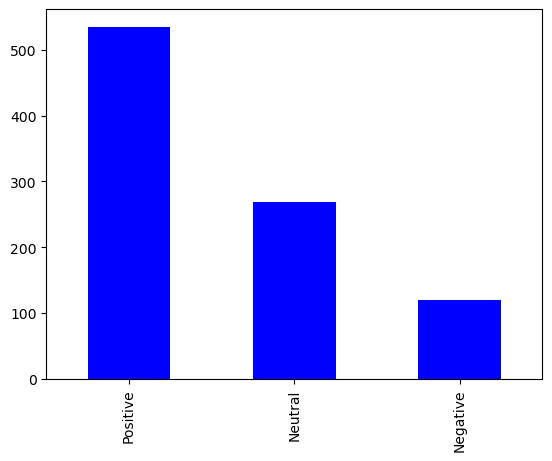

In [52]:
# Plot of sentiments

df_text.Sentiment.value_counts().plot(kind='bar',color='blue')
plt.title('Sentiment chart')
plt.legend()